In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [6]:
#ERA5
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era_z500 = ds_era.fields[716,14,260:40:-1,720:1200]

In [7]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210615_00_pl.nc')
variable_data_ec_1 = ds_ec_1['z'][56,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210616_00_pl.nc') 
variable_data_ec_2 = ds_ec_2['z'][52,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210617_00_pl.nc') 
variable_data_ec_3 = ds_ec_3['z'][48,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210618_00_pl.nc') 
variable_data_ec_4 = ds_ec_4['z'][44,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210619_00_pl.nc') 
variable_data_ec_5 = ds_ec_5['z'][40,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210620_00_pl.nc') 
variable_data_ec_6 = ds_ec_6['z'][36,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210621_00_pl.nc') 
variable_data_ec_7 = ds_ec_7['z'][32,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210622_00_pl.nc') 
variable_data_ec_8 = ds_ec_8['z'][28,2,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210623_00_pl.nc') 
variable_data_ec_9 = ds_ec_9['z'][24,2,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210624_00_pl.nc') 
variable_data_ec_10 = ds_ec_10['z'][20,2,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210625_00_pl.nc') 
variable_data_ec_11 = ds_ec_11['z'][16,2,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210626_00_pl.nc') 
variable_data_ec_12 = ds_ec_12['z'][12,2,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210627_00_pl.nc') 
variable_data_ec_13 = ds_ec_13['z'][8,2,:,:]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210628_00_pl.nc') 
variable_data_ec_14 = ds_ec_14['z'][4,2,:,:]

ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210629_00_pl.nc') 
variable_data_ec_15 = ds_ec_15['z'][0,2,:,:]

In [8]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [9]:
ds_ec_z500_cf = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [10]:
#z500 forecast error

#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_ec_z500_cf[:,220:0:-1,0:480].values
variable2 = ds_era_z500.values

In [11]:
np.shape(variable1)

(15, 220, 480)

In [12]:


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

forecasterr_ec_cf = np.empty((15,220,480))

for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        for k in range(15):
                batch_variable1 = variable1[k,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                forecasterr_ec_cf[k,i:i + batch_size, j:j + batch_size] = batch_difference

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [15]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:0012C7-15:0012C7-25:1136C4-35:0B90EF-45:FFFFFF-55:FFFFFF-65:FFA460-75:F95300-85:F63B1E-95:F93800
    (0.000, (0.000, 0.071, 0.780)),
    (0.050, (0.000, 0.071, 0.780)),
    (0.150, (0.000, 0.071, 0.780)),
    (0.250, (0.067, 0.212, 0.769)),
    (0.350, (0.043, 0.565, 0.937)),
    (0.450, (1.000, 1.000, 1.000)),
    (0.550, (1.000, 1.000, 1.000)),
    (0.650, (1.000, 0.643, 0.376)),
    (0.750, (0.976, 0.325, 0.000)),
    (0.850, (0.965, 0.231, 0.118)),
    (0.950, (0.976, 0.220, 0.000)),
    (1.000, (0.976, 0.220, 0.000))))

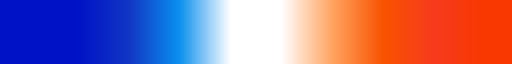

In [16]:
my_gradient

In [17]:
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#10:14146E-20:1529D4-30:2F66B9-40:FFFFFF-60:FFFFFF-70:F95300-80:F63B1E-90:9E2300
    (0.000, (0.078, 0.078, 0.431)),
    (0.100, (0.078, 0.078, 0.431)),
    (0.200, (0.082, 0.161, 0.831)),
    (0.300, (0.184, 0.400, 0.725)),
    (0.400, (1.000, 1.000, 1.000)),
    (0.600, (1.000, 1.000, 1.000)),
    (0.700, (0.976, 0.325, 0.000)),
    (0.800, (0.965, 0.231, 0.118)),
    (0.900, (0.620, 0.137, 0.000)),
    (1.000, (0.620, 0.137, 0.000))))

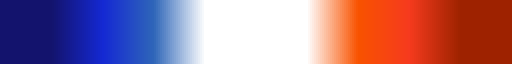

In [18]:
my_gradient

In [19]:
#1 - vmax/(vmax + abs(vmin))
mid_point = (np.max(forecasterr_ec_cf[8,:,:])/9.80665)/(np.abs(np.min(forecasterr_ec_cf[8,:,:])/9.80665)+(np.max(forecasterr_ec_cf[8,:,:])/9.80665))

1-mid_point

orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.42, name='shifted_29')

/scratch/slurm_tmpdir/job_22733097/ipykernel_112209/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


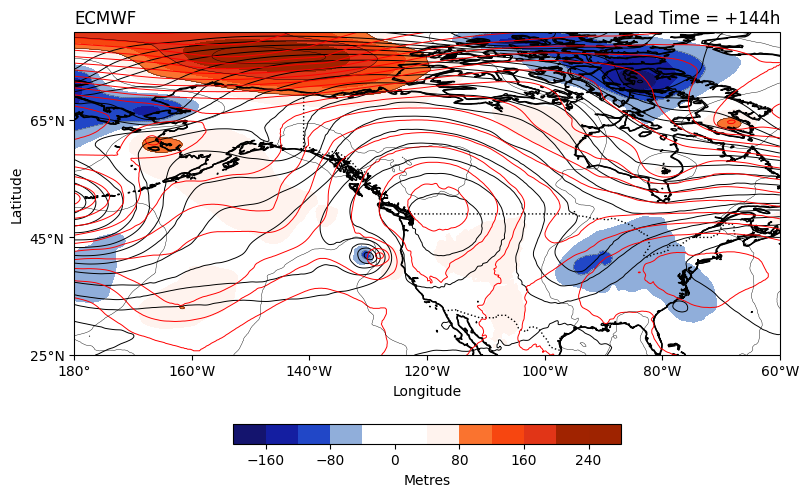

In [116]:
#ecmwf_cf_error_tracking

#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='w')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

num_levels = 9
colors = plt.cm.seismic(np.linspace(0, 1, num_levels + 1))

colors

colors[num_levels // 2] = [1, 1, 1, 1] # set to white
colors[num_levels // 2 + 1] = [1, 1, 1, 1]




# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contour(x,y,ds_ec_z500_cf[8,220:0:-1,0:480]/9.80665,colors='black',levels=20,linewidths=0.7)
ax.contour(x,y,ds_era_z500/9.80665,colors='red',levels=20,linewidths=0.7)
contour2 = ax.contourf(x,y,forecasterr_ec_cf[8,:,:]/9.80665, cmap=shifted_cmap,levels=11)
ax.contour(x,y,forecasterr_ec_cf[8,:,:]/9.80665,levels=5,colors = 'black',linewidths =0.3)
#contour2 = ax.pcolor(x,y,forecasterr_ec_cf[13,:,:]/9.80665, cmap='seismic',vmin=-25,vmax=25)
#contour2 = ax.pcolor(x,y,forecasterr_ec_cf[13,:,:]/9.80665, cmap=my_gradient)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour2, ax=ax, label='Metres',orientation='horizontal',shrink=0.5)

#cbar = plt.colorbar(contour2, ax=ax, label='(m)',orientation='horizontal',shrink=0.5)
# Set plot title and labels
plt.title('ECMWF',loc='left')
plt.title('Lead Time = +144h',loc='right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/23.10_error_tracking/ec_144.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()

In [117]:
ds_ec_1 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_ec_1 = ds_ec_1['forecast'][:,56,14,:,:]




ds_ec_2 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_ec_2 = ds_ec_2['forecast'][:,52,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_ec_3 = ds_ec_3['forecast'][:,48,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_ec_4 = ds_ec_4['forecast'][:,44,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_ec_5 = ds_ec_5['forecast'][:,40,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_ec_6 = ds_ec_6['forecast'][:,36,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_ec_7 = ds_ec_7['forecast'][:,32,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_ec_8 = ds_ec_8['forecast'][:,28,14,:,:]

ds_ec_9 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_ec_9 = ds_ec_9['forecast'][:,24,14,:,:]

ds_ec_10 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_ec_10 = ds_ec_10['forecast'][:,20,14,:,:]

ds_ec_11 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_ec_11 = ds_ec_11['forecast'][:,16,14,:,:]

ds_ec_12 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_ec_12 = ds_ec_12['forecast'][:,12,14,:,:]

ds_ec_13 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_ec_13 = ds_ec_13['forecast'][:,8,14,:,:]

ds_ec_14 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_ec_14 = ds_ec_14['forecast'][:,4,14,:,:]
ds_ec_15 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_ec_15 = ds_ec_15['forecast'][:,0,14,:,:]

In [118]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [119]:
ds_fc_ec_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [120]:
np.shape(ds_fc_ec_z500)

(15, 51, 220, 480)

In [121]:
ds_fc_ec_z500_cf = ds_fc_ec_z500[:,50,:,:]

In [124]:
#z500 forecast error

#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_fc_ec_z500_cf[:,::-1,:].values
variable2 = ds_era_z500.values

In [126]:
batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

forecasterr_fcn_ec_cf = np.empty((15,220,480))

for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        for k in range(15):
                batch_variable1 = variable1[k,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                forecasterr_fcn_ec_cf[k,i:i + batch_size, j:j + batch_size] = batch_difference

In [145]:
#1 - vmax/(vmax + abs(vmin))
mid_point = (np.max(forecasterr_fcn_ec_cf[8,:,:])/9.80665)/(np.abs(np.min(forecasterr_fcn_ec_cf[8,:,:])/9.80665)+(np.max(forecasterr_fcn_ec_cf[8,:,:])/9.80665))

1-mid_point

0.5554400890343074

In [147]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.55, name='shifted_35')

/scratch/slurm_tmpdir/job_22731410/ipykernel_684808/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


In [20]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
fcn_era_z = ds_fcn_era.forecast[:,:,:,14,:,:]

In [21]:
variable_data_ec_1 = fcn_era_z[1,:,56,:,:]


variable_data_ec_2 = fcn_era_z[2,:,52,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


variable_data_ec_3 = fcn_era_z[3,:,48,:,:]

variable_data_ec_4 = fcn_era_z[4,:,44,:,:]

variable_data_ec_5 = fcn_era_z[5,:,40,:,:]

variable_data_ec_6 = fcn_era_z[6,:,36,:,:]

variable_data_ec_7 = fcn_era_z[7,:,32,:,:]

variable_data_ec_8 = fcn_era_z[8,:,28,:,:]

variable_data_ec_9 = fcn_era_z[9,:,24,:,:]

variable_data_ec_10 = fcn_era_z[10,:,20,:,:]

variable_data_ec_11 = fcn_era_z[12,:,16,:,:]

variable_data_ec_12 = fcn_era_z[13,:,12,:,:]

variable_data_ec_13 = fcn_era_z[14,:,8,:,:]

variable_data_ec_14 = fcn_era_z[15,:,4,:,:]

variable_data_ec_15 = fcn_era_z[16,:,0,:,:]

In [22]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [23]:
ds_fc_era_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [24]:
ds_fc_era_z500_cf = ds_fc_era_z500[:,0,:,:]

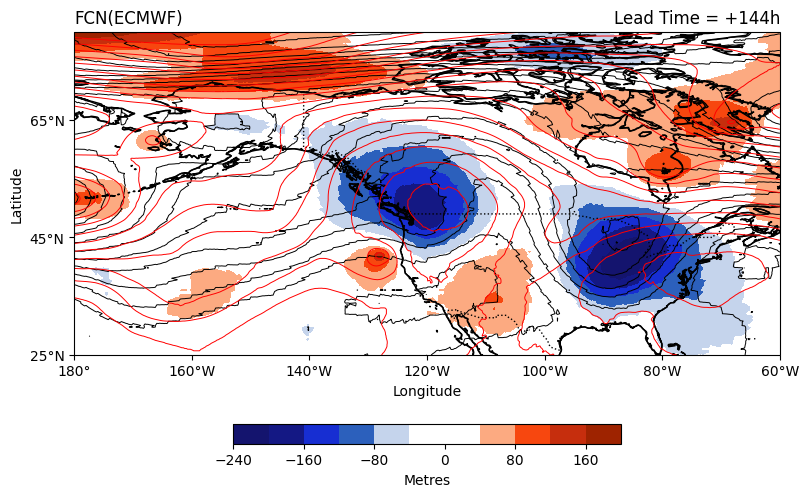

In [149]:
#fcn_ecmwf_cf_error_tracking
#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='w')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

num_levels = 9
colors = plt.cm.seismic(np.linspace(0, 1, num_levels + 1))

colors

colors[num_levels // 2] = [1, 1, 1, 1] # set to white
colors[num_levels // 2 + 1] = [1, 1, 1, 1]




# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contour(x,y,ds_fc_ec_z500_cf[8,::-1,:]/9.80665,colors='black',levels=20,linewidths=0.7)
ax.contour(x,y,ds_era_z500/9.80665,colors='red',levels=20,linewidths=0.7)
contour2 = ax.contourf(x,y,forecasterr_fcn_ec_cf[8,:,:]/9.80665, cmap=shifted_cmap,levels=11)
#ax.contour(x,y,forecasterr_fcn_ec_cf[13,:,:]/9.80665,levels=5,colors = 'black',linewidths =0.3)
#contour2 = ax.pcolor(x,y,forecasterr_ec_cf[13,:,:]/9.80665, cmap='seismic',vmin=-25,vmax=25)
#contour2 = ax.pcolor(x,y,forecasterr_ec_cf[13,:,:]/9.80665, cmap=my_gradient)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour2, ax=ax, label='Metres',orientation='horizontal',shrink=0.5)

#cbar = plt.colorbar(contour2, ax=ax, label='(m)',orientation='horizontal',shrink=0.5)
# Set plot title and labels
plt.title('FCN(ECMWF)',loc='left')
plt.title('Lead Time = +144h',loc='right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/23.10_error_tracking/fcn_ec_144.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()

In [25]:
#z500 forecast error

#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_fc_era_z500_cf[:,::-1,:].values
variable2 = ds_era_z500.values
batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

forecasterr_fcn_era_cf = np.empty((15,220,480))

for i in range(0, 220, batch_size):
    for j in range(0, 480, batch_size):
        for k in range(15):
                batch_variable1 = variable1[k,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                forecasterr_fcn_era_cf[k,i:i + batch_size, j:j + batch_size] = batch_difference

In [35]:
#1 - vmax/(vmax + abs(vmin))
mid_point = (np.max(forecasterr_fcn_era_cf[8,:,:])/9.80665)/(np.abs(np.min(forecasterr_fcn_era_cf[8,:,:])/9.80665)+(np.max(forecasterr_fcn_era_cf[8,:,:])/9.80665))

1-mid_point

0.428149713069782

In [36]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.42, name='shifted_40')

/scratch/slurm_tmpdir/job_22733097/ipykernel_112209/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


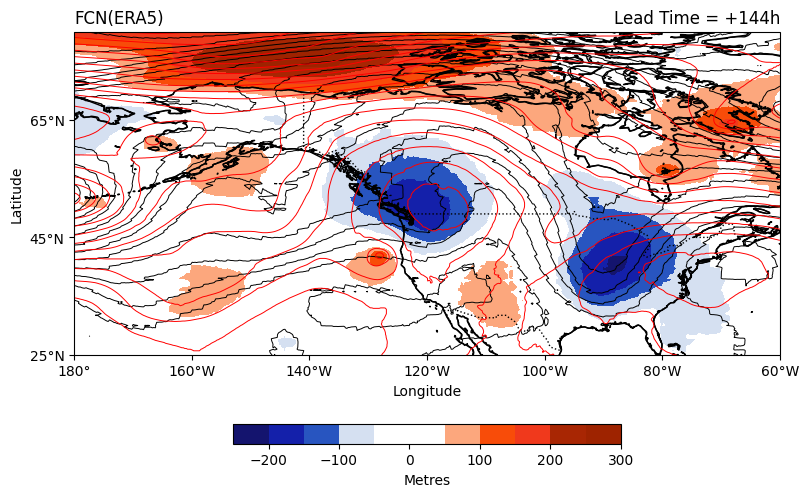

In [37]:
#fcn_era_cf_error_tracking
#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='w')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

num_levels = 9
colors = plt.cm.seismic(np.linspace(0, 1, num_levels + 1))

colors

colors[num_levels // 2] = [1, 1, 1, 1] # set to white
colors[num_levels // 2 + 1] = [1, 1, 1, 1]




# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contour(x,y,ds_fc_era_z500_cf[8,::-1,:]/9.80665,colors='black',levels=20,linewidths=0.7)
ax.contour(x,y,ds_era_z500/9.80665,colors='red',levels=20,linewidths=0.7)
contour2 = ax.contourf(x,y,forecasterr_fcn_era_cf[8,:,:]/9.80665, cmap=shifted_cmap,levels=11)
#ax.contour(x,y,forecasterr_fcn_ec_cf[13,:,:]/9.80665,levels=5,colors = 'black',linewidths =0.3)
#contour2 = ax.pcolor(x,y,forecasterr_ec_cf[13,:,:]/9.80665, cmap='seismic',vmin=-25,vmax=25)
#contour2 = ax.pcolor(x,y,forecasterr_ec_cf[13,:,:]/9.80665, cmap=my_gradient)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour2, ax=ax, label='Metres',orientation='horizontal',shrink=0.5)

#cbar = plt.colorbar(contour2, ax=ax, label='(m)',orientation='horizontal',shrink=0.5)
# Set plot title and labels
plt.title('FCN(ERA5)',loc='left')
plt.title('Lead Time = +144h',loc='right')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/23.10_error_tracking/fcn_era_144.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()